<a href="https://colab.research.google.com/github/Tirth1306/Speech-Emotion-Recognition/blob/main/SPEECH_EMOTION_RECOGNITION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SPEECH EMOTION RECOGNITION**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# librosa is a Python library for analyzing audio and music.
# It can be used to extract the data from the audio files we will see it later
import librosa 
import librosa.display

# to play the audio files
from IPython.display import Audio
plt.style.use('seaborn-white')

## Emotions Speech datasets
Content Data set contains files from RAVDESS speechs, CREMA-D, SAVEE, TESS.

Out of all files data sets make up:

CREMA-D - 7,442

TESS - 2,800

RAVDESS - 2,076

SAVEE - 480

In [ ]:
TESS = "../NLP Project/Dataset/TESS/"
RAV = "../NLP Project/Dataset/RAVDESS/"
SAVEE = "../NLP Project/Dataset/SAVEE/"
CREMA = "../NLP Project/Dataset/CREMA-D/"

In [ ]:
DATA_FRAMES = True
fem_path = '/content/drive/MyDrive/NLP Project/Female_features_all.csv'
mal_path = '/content/drive/MyDrive/NLP Project/Male_features_all.csv'

In [ ]:
# Get the data location for SAVEE
dir_list = os.listdir(SAVEE)

# parse the filename to get the emotions
emotion=[]
path = []
for i in dir_list:
    if i[-8:-6]=='_a':
        emotion.append('angry')
    elif i[-8:-6]=='_d':
        emotion.append('disgust')
    elif i[-8:-6]=='_f':
        emotion.append('fear')
    elif i[-8:-6]=='_h':
        emotion.append('happy')
    elif i[-8:-6]=='_n':
        emotion.append('neutral')
    elif i[-8:-6]=='sa':
        emotion.append('sad')
    elif i[-8:-6]=='su':
        emotion.append('surprise')
    else:
        emotion.append('unknown') 
    path.append(SAVEE + i)

# Now check out the label count distribution 
SAVEE_df = pd.DataFrame(emotion, columns = ['labels'])
SAVEE_df = pd.concat([SAVEE_df, pd.DataFrame(path, columns = ['path'])], axis = 1)
print('SAVEE dataset')
SAVEE_df.head()

SAVEE dataset


,labels,path
0,angry,D:/NLP Project/Dataset/SAVEE/DC_a01.wav
1,angry,D:/NLP Project/Dataset/SAVEE/DC_a02.wav
2,angry,D:/NLP Project/Dataset/SAVEE/DC_a03.wav
3,angry,D:/NLP Project/Dataset/SAVEE/DC_a04.wav
4,angry,D:/NLP Project/Dataset/SAVEE/DC_a05.wav


In [ ]:
# Get the data location for TESS
path = []
emotion = []
dir_list = os.listdir(TESS)

for i in dir_list:
    fname = os.listdir(TESS + i)   
    for f in fname:
        if i == 'OAF_angry' or i == 'YAF_angry':
            emotion.append('angry')
        elif i == 'OAF_disgust' or i == 'YAF_disgust':
            emotion.append('disgust')
        elif i == 'OAF_Fear' or i == 'YAF_fear':
            emotion.append('fear')
        elif i == 'OAF_happy' or i == 'YAF_happy':
            emotion.append('happy')
        elif i == 'OAF_neutral' or i == 'YAF_neutral':
            emotion.append('neutral')                                
        elif i == 'OAF_Pleasant_surprise' or i == 'YAF_pleasant_surprised':
            emotion.append('surprise')               
        elif i == 'OAF_Sad' or i == 'YAF_sad':
            emotion.append('sad')
        else:
            emotion.append('Unknown')
        path.append(TESS + i + "/" + f)

TESS_df = pd.DataFrame(emotion, columns = ['labels'])
#TESS_df['source'] = 'TESS'
TESS_df = pd.concat([TESS_df,pd.DataFrame(path, columns = ['path'])],axis=1)
print('TESS dataset')
TESS_df.head()

TESS dataset


,labels,path
0,angry,D:/NLP Project/Dataset/TESS/OAF_angry/OAF_back...
1,angry,D:/NLP Project/Dataset/TESS/OAF_angry/OAF_bar_...
2,angry,D:/NLP Project/Dataset/TESS/OAF_angry/OAF_base...
3,angry,D:/NLP Project/Dataset/TESS/OAF_angry/OAF_bath...
4,angry,D:/NLP Project/Dataset/TESS/OAF_angry/OAF_bean...


In [ ]:
# Importing datas from RAVDESS
dir = os.listdir(RAV)

males = []
females = [] 
        
for actor in dir:
       
    files = os.listdir(RAV + actor)
        
    for file in files: 
        part = file.split('.')[0]
        part = part.split("-")           
            
        temp = int(part[6])        
                
        if part[2] == '01':
            emotion = 'neutral'
        elif part[2] == '02':
            emotion = 'calm'
        elif part[2] == '03':
            emotion = 'happy'
        elif part[2] == '04':
            emotion = 'sad'
        elif part[2] == '05':
            emotion = 'angry'
        elif part[2] == '06':
            emotion = 'fear'
        elif part[2] == '07':
            emotion = 'disgust'
        elif part[2] == '08':
            emotion = 'surprise'
        else:
            emotion = 'unknown'
            
        if temp%2 == 0:
            path = (RAV + actor + '/' + file)
            #emotion = 'female_'+emotion
            females.append([emotion, path]) 
        else:
            path = (RAV + actor + '/' + file)
             #emotion = 'male_'+emotion
            males.append([emotion, path])   
    
   
RavFemales_df = pd.DataFrame(females)
RavFemales_df.columns = ['labels', 'path']

RavMales_df = pd.DataFrame(males)
RavMales_df.columns = ['labels', 'path']

print('RAVDESS datasets')


RAVDESS datasets


In [ ]:
RavFemales_df.head()

,labels,path
0,neutral,D:/NLP Project/Dataset/RAVDESS/Actor_02/03-01-...
1,neutral,D:/NLP Project/Dataset/RAVDESS/Actor_02/03-01-...
2,neutral,D:/NLP Project/Dataset/RAVDESS/Actor_02/03-01-...
3,neutral,D:/NLP Project/Dataset/RAVDESS/Actor_02/03-01-...
4,calm,D:/NLP Project/Dataset/RAVDESS/Actor_02/03-01-...


In [ ]:
RavMales_df.head()

,labels,path
0,neutral,D:/NLP Project/Dataset/RAVDESS/Actor_01/03-01-...
1,neutral,D:/NLP Project/Dataset/RAVDESS/Actor_01/03-01-...
2,neutral,D:/NLP Project/Dataset/RAVDESS/Actor_01/03-01-...
3,neutral,D:/NLP Project/Dataset/RAVDESS/Actor_01/03-01-...
4,calm,D:/NLP Project/Dataset/RAVDESS/Actor_01/03-01-...


In [ ]:
files = os.listdir(CREMA)

female = [1002,1003,1004,1006,1007,1008,1009,1010,1012,1013,1018,1020,1021,1024,1025,1028,1029,1030,1037,1043,1046,1047,1049,
          1052,1053,1054,1055,1056,1058,1060,1061,1063,1072,1073,1074,1075,1076,1078,1079,1082,1084,1089,1091]
males = []
females = []

for file in files: 
    part = file.split('_')   
    
    if part[2] == 'SAD':
        emotion = 'sad'
    elif part[2] == 'ANG':
        emotion = 'angry'
    elif part[2] == 'DIS':
        emotion = 'disgust'
    elif part[2] == 'FEA':
        emotion = 'fear'
    elif part[2] == 'HAP':
        emotion = 'happy'
    elif part[2] == 'NEU':
        emotion = 'neutral'  
    else:
        emotion = 'unknown'
        
    if int(part[0]) in female:
        path = (CREMA + file)
        #emotion = 'female_'+emotion
        females.append([emotion, path]) 
    else:
        path = (CREMA + file)
        #emotion = 'male_'+emotion
        males.append([emotion, path])   
    
CremaFemales_df = pd.DataFrame(females)
CremaFemales_df.columns = ['labels', 'path']

CremaMales_df = pd.DataFrame(males)
CremaMales_df.columns = ['labels', 'path']
    
print('CREMA datasets')


CREMA datasets


In [ ]:
CremaFemales_df.head()

,labels,path
0,angry,D:/NLP Project/Dataset/CREMA-D/1002_DFA_ANG_XX...
1,disgust,D:/NLP Project/Dataset/CREMA-D/1002_DFA_DIS_XX...
2,fear,D:/NLP Project/Dataset/CREMA-D/1002_DFA_FEA_XX...
3,happy,D:/NLP Project/Dataset/CREMA-D/1002_DFA_HAP_XX...
4,neutral,D:/NLP Project/Dataset/CREMA-D/1002_DFA_NEU_XX...


In [ ]:
CremaMales_df.head()

,labels,path
0,angry,D:/NLP Project/Dataset/CREMA-D/1001_DFA_ANG_XX...
1,disgust,D:/NLP Project/Dataset/CREMA-D/1001_DFA_DIS_XX...
2,fear,D:/NLP Project/Dataset/CREMA-D/1001_DFA_FEA_XX...
3,happy,D:/NLP Project/Dataset/CREMA-D/1001_DFA_HAP_XX...
4,neutral,D:/NLP Project/Dataset/CREMA-D/1001_DFA_NEU_XX...


In [ ]:
# Now lets merge all the dataframe
Males = pd.concat([SAVEE_df, RavMales_df, CremaMales_df], axis = 0)
Males.to_csv("males_emotions_df.csv", index = False)

Females = pd.concat([TESS_df, RavFemales_df, CremaFemales_df], axis = 0)
Females.to_csv("females_emotions_df.csv", index = False)

## Data Visualization
First, we will plot the number of emotions (of wich above there are the proportions). Then using Librosa there will be some waveplots related to each emotion

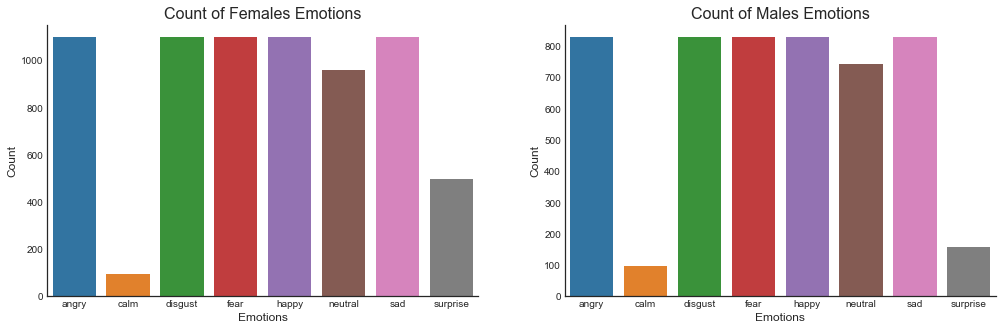

In [ ]:
order = ['angry','calm','disgust','fear','happy','neutral','sad','surprise']

fig = plt.figure(figsize=(17, 5))

fig.add_subplot(121)
plt.title('Count of Females Emotions', size=16)
sns.countplot(Females.labels, order = order)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)

fig.add_subplot(122)
plt.title('Count of Males Emotions', size=16)
sns.countplot(Males.labels, order = order)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)

plt.show()

In [ ]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title(f'Waveplot for audio with {e} emotion', size=15)
    librosa.display.waveplot(data, sr=sr)
    plt.show()

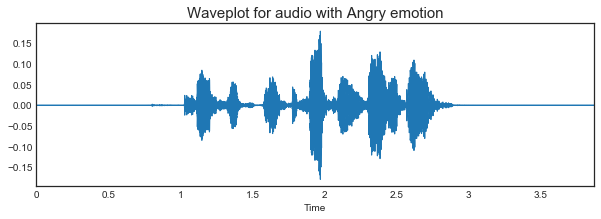

In [ ]:
emotion='Angry'
path = 'D:/NLP Project/Dataset/RAVDESS/Actor_01/03-01-05-01-01-01-01.wav'
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
Audio(path)

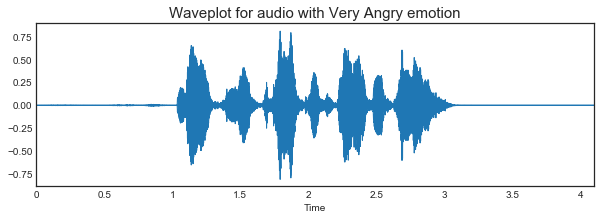

In [ ]:
emotion='Very Angry' 
path = 'D:/NLP Project/Dataset/RAVDESS/Actor_01/03-01-05-02-01-01-01.wav'
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
Audio(path)

## Adding augmentation

Definition: Data augmentation is the process by which we create new synthetic training samples by adding small perturbations on our initial training set.

The objective is to make our model invariant to those perturbations and enhace its ability to generalize.

In order to this to work adding the perturbations must conserve the same label as the original training sample.

In images data augmention can be performed by shifting the image, zooming, rotating ...

In our case we will add noise, stretch and roll, pitch shift ...

In [ ]:
def noise(data):
    noise_amp = 0.04*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.70):
    return librosa.effects.time_stretch(data, rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.8):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)

def higher_speed(data, speed_factor = 1.25):
    return librosa.effects.time_stretch(data, speed_factor)

def lower_speed(data, speed_factor = 0.75):
    return librosa.effects.time_stretch(data, speed_factor)

In [ ]:
# taking any example and checking for techniques.
path = path = 'D:/NLP Project/Dataset/RAVDESS/Actor_01/03-01-05-01-01-01-01.wav'
data, sample_rate = librosa.load(path)

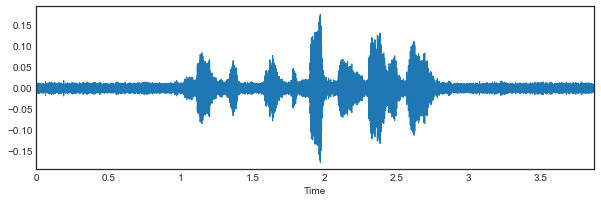

In [ ]:

plt.figure(figsize=(10,3))
x = noise(data)
librosa.display.waveplot(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

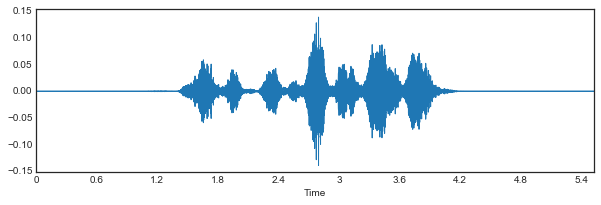

In [ ]:
plt.figure(figsize=(10,3))
x = stretch(data)
librosa.display.waveplot(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

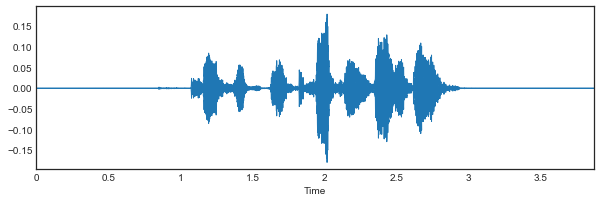

In [ ]:
plt.figure(figsize=(10,3))
x = shift(data)
librosa.display.waveplot(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)


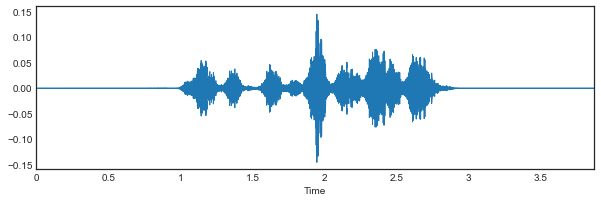

In [ ]:
plt.figure(figsize=(10,3))
x = pitch(data, sample_rate)
librosa.display.waveplot(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)


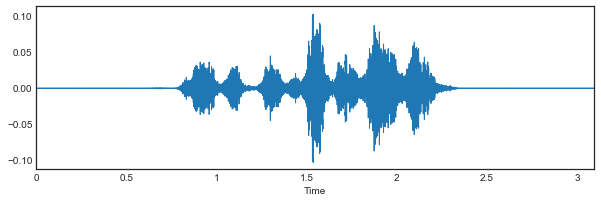

In [ ]:
plt.figure(figsize=(10,3))
x = higher_speed(data)
librosa.display.waveplot(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

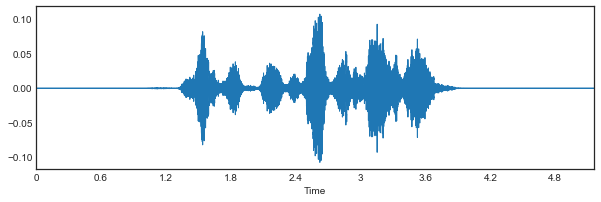

In [ ]:
plt.figure(figsize=(10,3))
x = lower_speed(data)
librosa.display.waveplot(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

# Feature Extraction

As we understand, the data provided from audio cannot be understood by the models directly, so we need to convert them into an understandable format for which feature extraction is used. The audio signal is a three-dimensional signal in which three axes represent time, amplitude and frequency.

Looking at the waveplots above seems clear (from an eye test) that the waveform itself may not necessarily yield clear class identifying information. Infact they look quite similar.

It turns out one of the best tool to feature extract from audio waveforms ( and digital signal in general) is Mel Frequency Cepstral Coefficents (MFCCs). Below we will go through a brief technical discussion, just to see how MFCCs works

### Mel-Frequency Cepstral Coefficients (MFCCs)
This feature is one of the most important method to extract a feature of an audio signal and is used majorly whenever working on audio signals. The mel frequency cepstral coefficients (MFCCs) of a signal are a small set of features (usually about 10–20) which concisely describe the overall shape of a spectral envelope.

In [ ]:
#sample_rate = 22050

def extract_features(data):
    
    result = np.array([])
    
    #mfccs = librosa.feature.mfcc(y=data, sr=22050, n_mfcc=42) #42 mfcc so we get frames of ~60 ms
    mfccs = librosa.feature.mfcc(y=data, sr=22050, n_mfcc=58)
    mfccs_processed = np.mean(mfccs.T,axis=0)
    result = np.array(mfccs_processed)
     
    return result

def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=3, offset=0.5, res_type='kaiser_fast') 
    
    #without augmentation
    res1 = extract_features(data)
    result = np.array(res1)
    
    #noised
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2)) # stacking vertically
    
    #stretched
    stretch_data = stretch(data)
    res3 = extract_features(stretch_data)
    result = np.vstack((result, res3))
    
    #shifted
    shift_data = shift(data)
    res4 = extract_features(shift_data)
    result = np.vstack((result, res4))
    
    #pitched
    pitch_data = pitch(data, sample_rate)
    res5 = extract_features(pitch_data)
    result = np.vstack((result, res5)) 
    
    #speed up
    higher_speed_data = higher_speed(data)
    res6 = extract_features(higher_speed_data)
    result = np.vstack((result, res6))
    
    #speed down
    lower_speed_data = higher_speed(data)
    res7 = extract_features(lower_speed_data)
    result = np.vstack((result, res7))
    
    return result

In [ ]:
if not DATA_FRAMES:
    
    female_X, female_Y = [], []
    for path, emotion in zip(Females.path, Females.labels):
        features = get_features(path)
        #adding augmentation, get_features return a multi dimensional array (for each augmentation), so we have to use a loop to fill the df
        for elem in features: 
            female_X.append(elem)        
            female_Y.append(emotion)
    

    male_X, male_Y = [], []
    for path, emotion in zip(Males.path, Males.labels):
        features = get_features(path)
        for elem in features:
            male_X.append(elem)
            male_Y.append(emotion)
            
    print(f'Check shapes:\nFemale features: {len(female_X)}, labels: {len(female_Y)}\nMale features:   {len(male_X)}, labels: {len(male_Y)}')

In [ ]:
def setup_dataframe(gender, features, labels):
    df = pd.DataFrame(features)
    df['labels'] = labels
    df.to_csv(f'{gender}_features.csv', index=False)
    
    print(f'{gender} dataframe')
    df.sample(frac=1).head()
    
    return df

## **Importing CSV**

In [ ]:
if not DATA_FRAMES:
    Females_Features = setup_dataframe('Female', female_X, female_Y)
else:
    Females_Features = pd.read_csv(fem_path)

In [ ]:
if not DATA_FRAMES:
    Males_Features = setup_dataframe('Male', male_X, male_Y)
else:
    Males_Features = pd.read_csv(mal_path)

## Data Preparation
As of now we have extracted the data, now we need to normalize and split our data for training and testing.

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [ ]:
female_X = Females_Features.iloc[: ,:-1].values
female_Y = Females_Features['labels'].values

male_X = Males_Features.iloc[: ,:-1].values
male_Y = Males_Features['labels'].values

In [ ]:
# As this is a multiclass classification problem onehotencoding our Y.
encoder = OneHotEncoder()

female_Y = encoder.fit_transform(np.array(female_Y).reshape(-1,1)).toarray()
male_Y = encoder.fit_transform(np.array(male_Y).reshape(-1,1)).toarray()

## Splitting data
Just for adding more proves that gender separation have sense

In [ ]:
nogender_X = np.concatenate((female_X, male_X))
nogender_Y = np.concatenate((female_Y, male_Y))

x_train, x_test, y_train, y_test = train_test_split(nogender_X, nogender_Y, random_state=0, test_size=0.20, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((68107, 114), (68107, 8), (17027, 114), (17027, 8))

In [ ]:
x_trainF, x_testF, y_trainF, y_testF = train_test_split(female_X, female_Y, random_state=0, test_size=0.20, shuffle=True)
x_trainF.shape, y_trainF.shape, x_testF.shape, y_testF.shape

((39379, 114), (39379, 8), (9845, 114), (9845, 8))

In [ ]:
x_trainM, x_testM, y_trainM, y_testM = train_test_split(male_X, male_Y, random_state=0, test_size=0.20, shuffle=True)
x_trainM.shape, y_trainM.shape, x_testM.shape, y_testM.shape

((28728, 114), (28728, 8), (7182, 114), (7182, 8))

We are going to scale our features throught the StandarScaler module, it standardize the features in a Normal curve, i.e.:

                                                 Z=(X−μ)/σ 

Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly if the individual features do not more or less look like standard normally distributed data (e.g. Gaussian with 0 mean and unit variance).

In [ ]:
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

x_trainF = scaler.fit_transform(x_trainF)
x_testF = scaler.transform(x_testF)

x_trainM = scaler.fit_transform(x_trainM)
x_testM = scaler.transform(x_testM)

## Making our data compatible to model

In [ ]:
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape , x_test.shape , y_test.shape

((68107, 114, 1), (68107, 8), (17027, 114, 1), (17027, 8))

In [ ]:
x_trainF = np.expand_dims(x_trainF, axis=2)
x_testF = np.expand_dims(x_testF, axis=2)
x_trainF.shape, y_trainF.shape, x_testF.shape, y_testF.shape

((39379, 114, 1), (39379, 8), (9845, 114, 1), (9845, 8))

In [ ]:
x_trainM = np.expand_dims(x_trainM, axis=2)
x_testM = np.expand_dims(x_testM, axis=2)
x_trainM.shape, y_trainM.shape, x_testM.shape, y_testM.shape

((28728, 114, 1), (28728, 8), (7182, 114, 1), (7182, 8))

## Modeling

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization, AveragePooling1D,TimeDistributed
from keras.utils import np_utils, to_categorical
from keras.callbacks import ModelCheckpoint
from keras.layers import BatchNormalization

In [ ]:
def build_model(in_shape):
        
    model=Sequential()
    model.add(Conv1D(256, kernel_size=6, strides=1, padding='same', activation='relu', input_shape=(in_shape, 1)))
    model.add(AveragePooling1D(pool_size=4, strides = 2, padding = 'same'))

    model.add(Conv1D(128, kernel_size=6, strides=1, padding='same', activation='relu'))
    model.add(AveragePooling1D(pool_size=4, strides = 2, padding = 'same'))

    model.add(Conv1D(128, kernel_size=6, strides=1, padding='same', activation='relu'))
    model.add(AveragePooling1D(pool_size=4, strides = 2, padding = 'same'))
    model.add(Dropout(0.2))

    model.add(Conv1D(64, kernel_size=6, strides=1, padding='same', activation='relu'))
    model.add(MaxPooling1D(pool_size=4, strides = 2, padding = 'same'))

    model.add(Flatten())
    model.add(Dense(units=32, activation='relu'))
    model.add(Dropout(0.3))

    model.add(Dense(units=8, activation='softmax'))
    model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])


    return model

In [ ]:
def model_build_summary(mod_dim, tr_features, val_features, val_labels):
    model = build_model(mod_dim)
    model.summary()
    
    score = model.evaluate(val_features, val_labels, verbose = 1)
    accuracy = 100*score[1]
    
    return model

### ReduceLROnPlateau reduce learning rate when a metric has stopped improving.

Models often benefit from reducing the learning rate by a factor of 2-10 once learning stagnates. This callback monitors a quantity and if no improvement is seen for a 'patience' number of epochs, the learning rate is reduced.

In [ ]:
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=4, min_lr=0.000001)

batch_size = 32
n_epochs = 75

In [ ]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='model.hdf5',
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [ ]:
def show_graphs(history):
    epochs = [i for i in range(n_epochs)]
    fig , ax = plt.subplots(1,2)
    train_acc = history.history['accuracy']
    train_loss = history.history['loss']
    test_acc = history.history['val_accuracy']
    test_loss = history.history['val_loss']

    fig.set_size_inches(30,12)
    ax[0].plot(epochs , train_loss , label = 'Training Loss')
    ax[0].plot(epochs , test_loss , label = 'Testing Loss')
    ax[0].set_title('Training & Testing Loss')
    ax[0].legend()
    ax[0].set_xlabel("Epochs")

    ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
    ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
    ax[1].set_title('Training & Testing Accuracy')
    ax[1].legend()
    ax[1].set_xlabel("Epochs")
    plt.show()

## **LSTM**

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Bidirectional

In [ ]:
model = Sequential()
model.add(LSTM(256, return_sequences = True))
model.add(LSTM(128))
model.add(Dense(units=8, activation='softmax'))

In [ ]:
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

In [ ]:
history = model.fit(x_trainM, y_trainM, batch_size=batch_size, epochs=n_epochs, validation_data=(x_testM, y_testM), callbacks=[rlrp,model_checkpoint_callback])

Epoch 1/75
898/898 [==============================] - 18s 17ms/step - loss: 1.7863 - accuracy: 0.2826 - val_loss: 1.6654 - val_accuracy: 0.3436
Epoch 2/75
898/898 [==============================] - 14s 16ms/step - loss: 1.6826 - accuracy: 0.3245 - val_loss: 1.6272 - val_accuracy: 0.3470
Epoch 3/75
898/898 [==============================] - 14s 16ms/step - loss: 1.6138 - accuracy: 0.3437 - val_loss: 1.5631 - val_accuracy: 0.3668
Epoch 4/75
898/898 [==============================] - 14s 15ms/step - loss: 1.5494 - accuracy: 0.3647 - val_loss: 1.5238 - val_accuracy: 0.3700
Epoch 5/75
898/898 [==============================] - 14s 16ms/step - loss: 1.5049 - accuracy: 0.3875 - val_loss: 1.4988 - val_accuracy: 0.3931
Epoch 6/75
898/898 [==============================] - 14s 16ms/step - loss: 1.4780 - accuracy: 0.3980 - val_loss: 1.4580 - val_accuracy: 0.4020
Epoch 7/75
898/898 [==============================] - 14s 16ms/step - loss: 1.4632 - accuracy: 0.4024 - val_loss: 1.4665 - val_accuracy:

In [ ]:
# genderless
score = model.evaluate(x_trainM,y_trainM, verbose = 0)
print("Mixed-gender emotions training Accuracy: {0:.2%}".format(score[1]))

score = model.evaluate(x_testM, y_testM, verbose=0)
print("Mixed-gender emotions testing Accuracy: {0:.2%}".format(score[1]))

Mixed-gender emotions training Accuracy: 98.87%
Mixed-gender emotions testing Accuracy: 81.57%


### **LSTM + CNN**

In [ ]:
model=Sequential()
model.add(Conv1D(256, kernel_size=6, strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(AveragePooling1D(pool_size=4, strides = 2, padding = 'same'))
model.add(Dropout(0.3))

model.add(Conv1D(128, kernel_size=6, strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(AveragePooling1D(pool_size=4, strides = 2, padding = 'same'))
model.add(Dropout(0.3))

model.add(Conv1D(128, kernel_size=6, strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(AveragePooling1D(pool_size=4, strides = 2, padding = 'same'))
model.add(Dropout(0.3))

model.add(Conv1D(64, kernel_size=6, strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=4, strides = 2, padding = 'same'))

# model.add(Flatten())
model.add(Bidirectional(LSTM(128)))
model.add(Dropout(0.3))

model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=8, activation='softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

In [ ]:
history = model.fit(x_trainM, y_trainM, batch_size=batch_size, epochs=n_epochs, validation_data=(x_testM, y_testM), callbacks=[rlrp,model_checkpoint_callback])

Epoch 1/75
2129/2129 [==============================] - 31s 14ms/step - loss: 0.8982 - accuracy: 0.6871 - val_loss: 0.6551 - val_accuracy: 0.7557
Epoch 2/75
2129/2129 [==============================] - 30s 14ms/step - loss: 0.6969 - accuracy: 0.7470 - val_loss: 0.5606 - val_accuracy: 0.7966
Epoch 3/75
2129/2129 [==============================] - 30s 14ms/step - loss: 0.6109 - accuracy: 0.7804 - val_loss: 0.4935 - val_accuracy: 0.8198
Epoch 4/75
2129/2129 [==============================] - 30s 14ms/step - loss: 0.5494 - accuracy: 0.8030 - val_loss: 0.4444 - val_accuracy: 0.8383
Epoch 5/75
2129/2129 [==============================] - 30s 14ms/step - loss: 0.4973 - accuracy: 0.8237 - val_loss: 0.4422 - val_accuracy: 0.8427
Epoch 6/75
2129/2129 [==============================] - 30s 14ms/step - loss: 0.4582 - accuracy: 0.8390 - val_loss: 0.3904 - val_accuracy: 0.8659
Epoch 7/75
2129/2129 [==============================] - 30s 14ms/step - loss: 0.4199 - accuracy: 0.8520 - val_loss: 0.3673 -

In [ ]:
# genderless
score = model.evaluate(x_trainF,y_trainF, verbose = 0)
print("Mixed-gender emotions training Accuracy: {0:.2%}".format(score[1]))

score = model.evaluate(x_testF, y_testF, verbose=0)
print("Mixed-gender emotions testing Accuracy: {0:.2%}".format(score[1]))

Mixed-gender emotions training Accuracy: 99.79%
Mixed-gender emotions testing Accuracy: 94.83%


# **Transfer Learning**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization, AveragePooling1D,TimeDistributed, Input
from keras.utils import np_utils, to_categorical
from keras.callbacks import ModelCheckpoint
from keras.layers import BatchNormalization

# example of loading the vgg16 model
from keras.applications.vgg16 import VGG16

In [ ]:
new_input = Input(shape=(28728, 114, 1))
model = VGG16(include_top=False, input_tensor=new_input, pooling='avg')

58892288/58889256 [==============================] - 0s 0us/step


ValueError: ignored

In [ ]:
base_model = keras.applications.Xception(
    weights="imagenet",  # Load weights pre-trained on ImageNet.
    input_shape=((28728, 114, 1)),
    include_top=False,
)  # Do not include the ImageNet classifier at the top.

# Freeze the base_model
base_model.trainable = False

# Create new model on top
inputs = keras.Input(shape=((28728, 114, 1)))


# The base model contains batchnorm layers. We want to keep them in inference mode
# when we unfreeze the base model for fine-tuning, so we make sure that the
# base_model is running in inference mode here.
x = base_model(x_train, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dropout(0.2)(x)  # Regularize with dropout
outputs = keras.layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

model.summary()

ValueError: ignored

## Model Summary and Pre-training Accuracy

In [ ]:
total_model = model_build_summary(x_train.shape[1], x_train, x_test, y_test)

ValueError: ignored

In [ ]:
female_model = model_build_summary(x_trainF.shape[1], x_trainF, x_testF, y_testF)

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_12 (Conv1D)           (None, 50, 256)           1792      
_________________________________________________________________
average_pooling1d_9 (Average (None, 25, 256)           0         
_________________________________________________________________
conv1d_13 (Conv1D)           (None, 25, 128)           196736    
_________________________________________________________________
average_pooling1d_10 (Averag (None, 13, 128)           0         
_________________________________________________________________
conv1d_14 (Conv1D)           (None, 13, 128)           98432     
_________________________________________________________________
average_pooling1d_11 (Averag (None, 7, 128)            0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 7, 128)           

In [ ]:
male_model = model_build_summary(x_trainM.shape[1], x_trainM, x_testM, y_testM)

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_16 (Conv1D)           (None, 50, 256)           1792      
_________________________________________________________________
average_pooling1d_12 (Averag (None, 25, 256)           0         
_________________________________________________________________
conv1d_17 (Conv1D)           (None, 25, 128)           196736    
_________________________________________________________________
average_pooling1d_13 (Averag (None, 13, 128)           0         
_________________________________________________________________
conv1d_18 (Conv1D)           (None, 13, 128)           98432     
_________________________________________________________________
average_pooling1d_14 (Averag (None, 7, 128)            0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 7, 128)           

## Model Training

In [ ]:
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=n_epochs, validation_data=(x_test, y_test), callbacks=[rlrp,model_checkpoint_callback])

NameError: ignored

In [ ]:
female_history = female_model.fit(x_trainF, y_trainF, batch_size=batch_size, epochs=n_epochs, validation_data=(x_testF, y_testF), callbacks=[rlrp,model_checkpoint_callback],)

Epoch 1/75
1231/1231 [==============================] - 6s 5ms/step - loss: 1.6669 - accuracy: 0.3254 - val_loss: 1.4390 - val_accuracy: 0.4478
Epoch 2/75
1231/1231 [==============================] - 6s 5ms/step - loss: 1.3911 - accuracy: 0.4623 - val_loss: 1.2411 - val_accuracy: 0.5301
Epoch 3/75
1231/1231 [==============================] - 6s 5ms/step - loss: 1.2460 - accuracy: 0.5255 - val_loss: 1.1329 - val_accuracy: 0.5665
Epoch 4/75
1231/1231 [==============================] - 6s 5ms/step - loss: 1.1566 - accuracy: 0.5632 - val_loss: 1.0524 - val_accuracy: 0.5896
Epoch 5/75
1231/1231 [==============================] - 6s 5ms/step - loss: 1.0914 - accuracy: 0.5825 - val_loss: 1.0209 - val_accuracy: 0.6136
Epoch 6/75
1231/1231 [==============================] - 6s 5ms/step - loss: 1.0377 - accuracy: 0.6029 - val_loss: 0.9245 - val_accuracy: 0.6466
Epoch 7/75
1231/1231 [==============================] - 6s 5ms/step - loss: 0.9954 - accuracy: 0.6161 - val_loss: 0.9067 - val_accuracy:

In [ ]:
male_history = male_model.fit(x_trainM, y_trainM, batch_size=batch_size, epochs=n_epochs, validation_data=(x_testM, y_testM), callbacks=[rlrp,model_checkpoint_callback])

Epoch 1/75
898/898 [==============================] - 5s 5ms/step - loss: 1.7802 - accuracy: 0.2871 - val_loss: 1.6724 - val_accuracy: 0.3336
Epoch 2/75
898/898 [==============================] - 4s 4ms/step - loss: 1.6644 - accuracy: 0.3320 - val_loss: 1.5850 - val_accuracy: 0.3566
Epoch 3/75
898/898 [==============================] - 4s 5ms/step - loss: 1.6188 - accuracy: 0.3467 - val_loss: 1.5410 - val_accuracy: 0.3673
Epoch 4/75
898/898 [==============================] - 4s 5ms/step - loss: 1.5890 - accuracy: 0.3572 - val_loss: 1.5489 - val_accuracy: 0.3789
Epoch 5/75
898/898 [==============================] - 4s 5ms/step - loss: 1.5656 - accuracy: 0.3676 - val_loss: 1.4966 - val_accuracy: 0.3894
Epoch 6/75
898/898 [==============================] - 4s 5ms/step - loss: 1.5382 - accuracy: 0.3757 - val_loss: 1.4879 - val_accuracy: 0.3954
Epoch 7/75
898/898 [==============================] - 4s 4ms/step - loss: 1.5187 - accuracy: 0.3850 - val_loss: 1.4558 - val_accuracy: 0.4074
Epoch 

In [ ]:
# genderless
score = total_model.evaluate(x_train,y_train, verbose = 0)
print("Mixed-gender emotions training Accuracy: {0:.2%}".format(score[1]))

score = total_model.evaluate(x_test, y_test, verbose=0)
print("Mixed-gender emotions testing Accuracy: {0:.2%}".format(score[1]))

Mixed-gender emotions training Accuracy: 75.91%
Mixed-gender emotions testing Accuracy: 71.08%


In [ ]:
score = female_model.evaluate(x_trainF,y_trainF, verbose = 0)
print("Female emotions training Accuracy: {0:.2%}".format(score[1]))

score = female_model.evaluate(x_testF, y_testF, verbose=0)
print("Female emotions testing Accuracy: {0:.2%}".format(score[1]))

Female emotions training Accuracy: 86.91%
Female emotions testing Accuracy: 82.95%


In [ ]:
score = male_model.evaluate(x_trainM,y_trainM, verbose = 0)
print("Male emotions training Accuracy: {0:.2%}".format(score[1]))

score = male_model.evaluate(x_testM, y_testM, verbose=0)
print("Male emotions testing Accuracy: {0:.2%}".format(score[1]))

Male emotions training Accuracy: 68.37%
Male emotions testing Accuracy: 62.71%


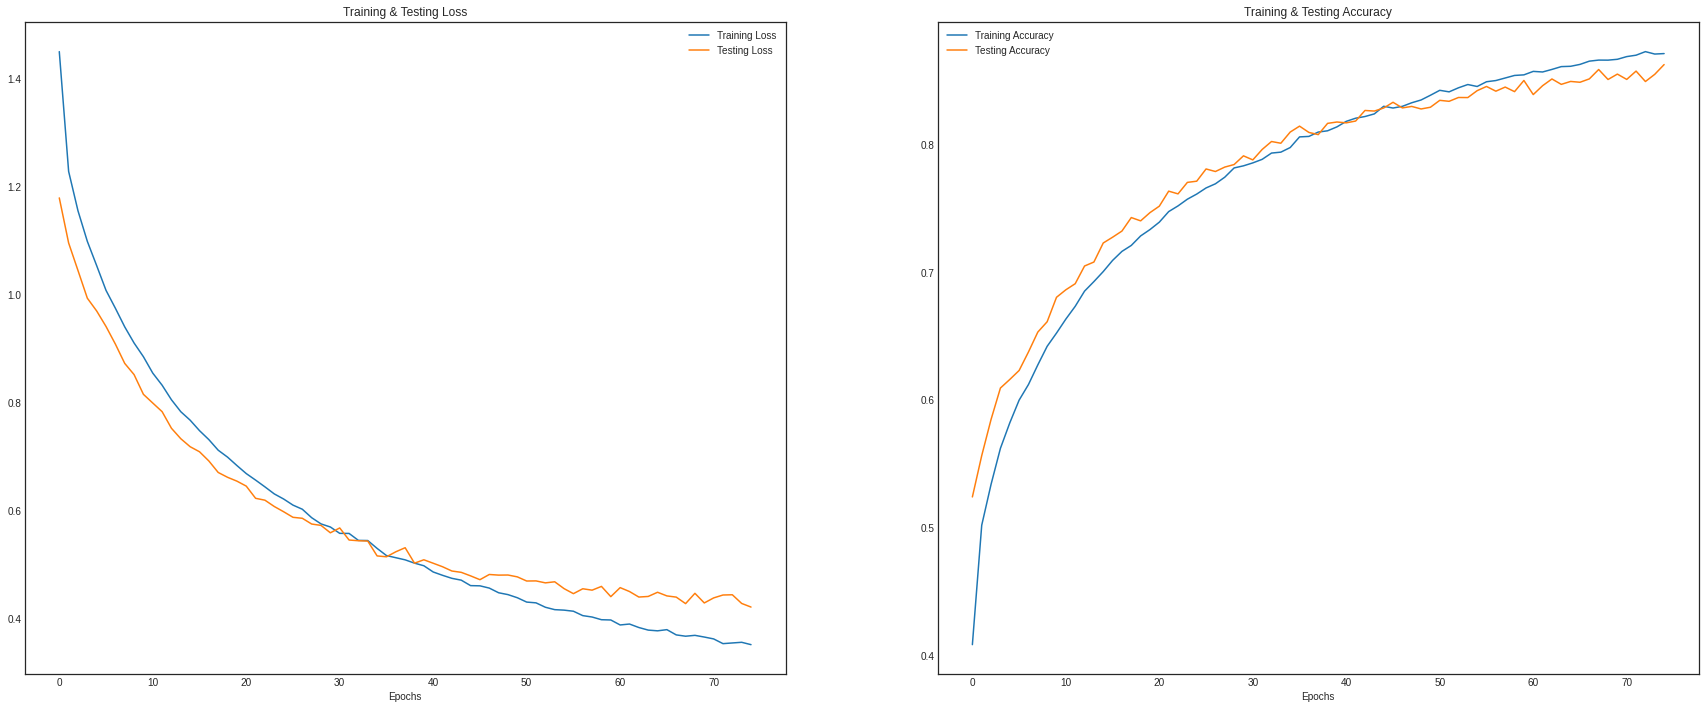

In [ ]:
show_graphs(history)

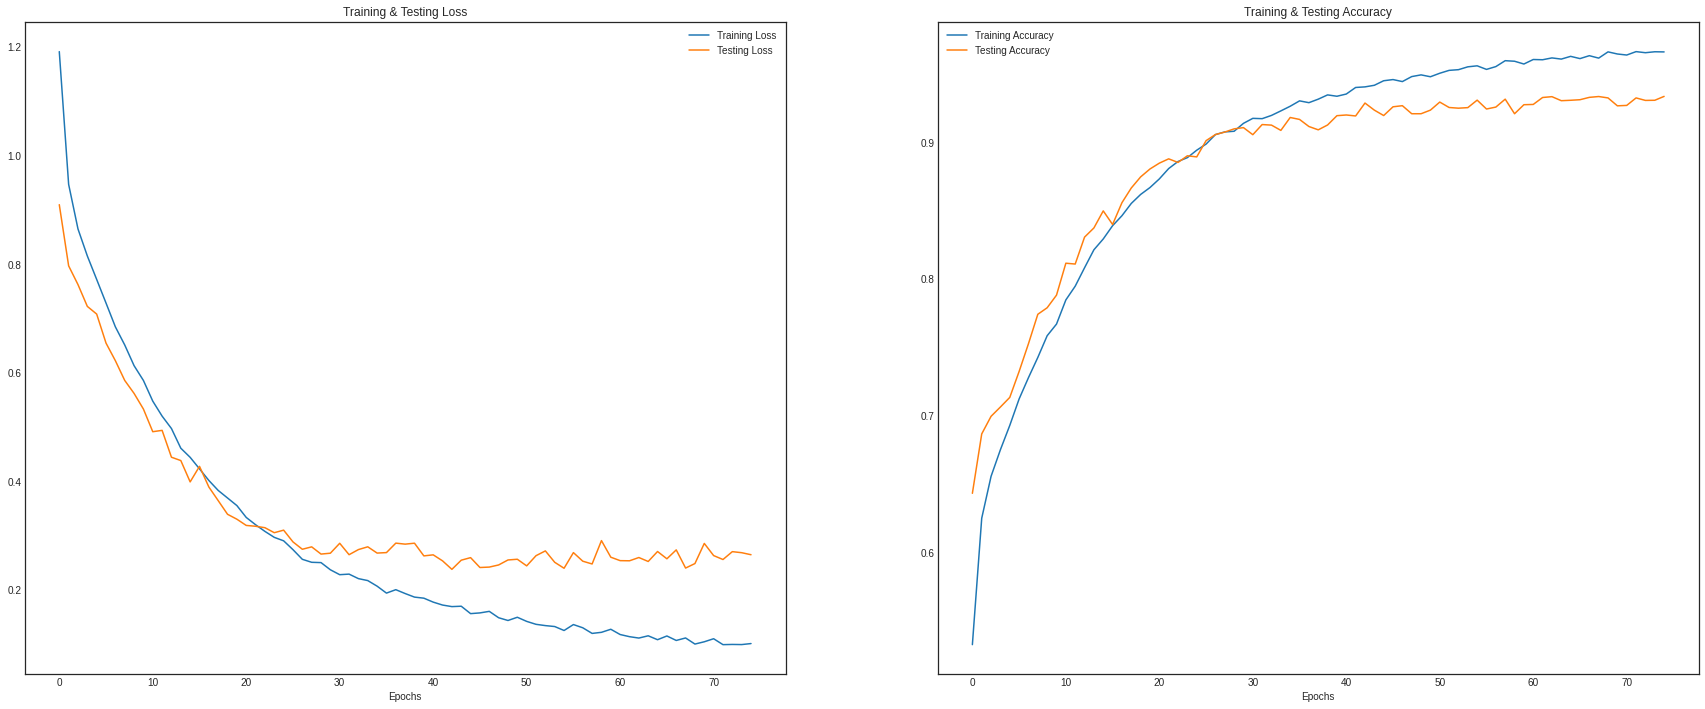

In [ ]:
show_graphs(female_history)

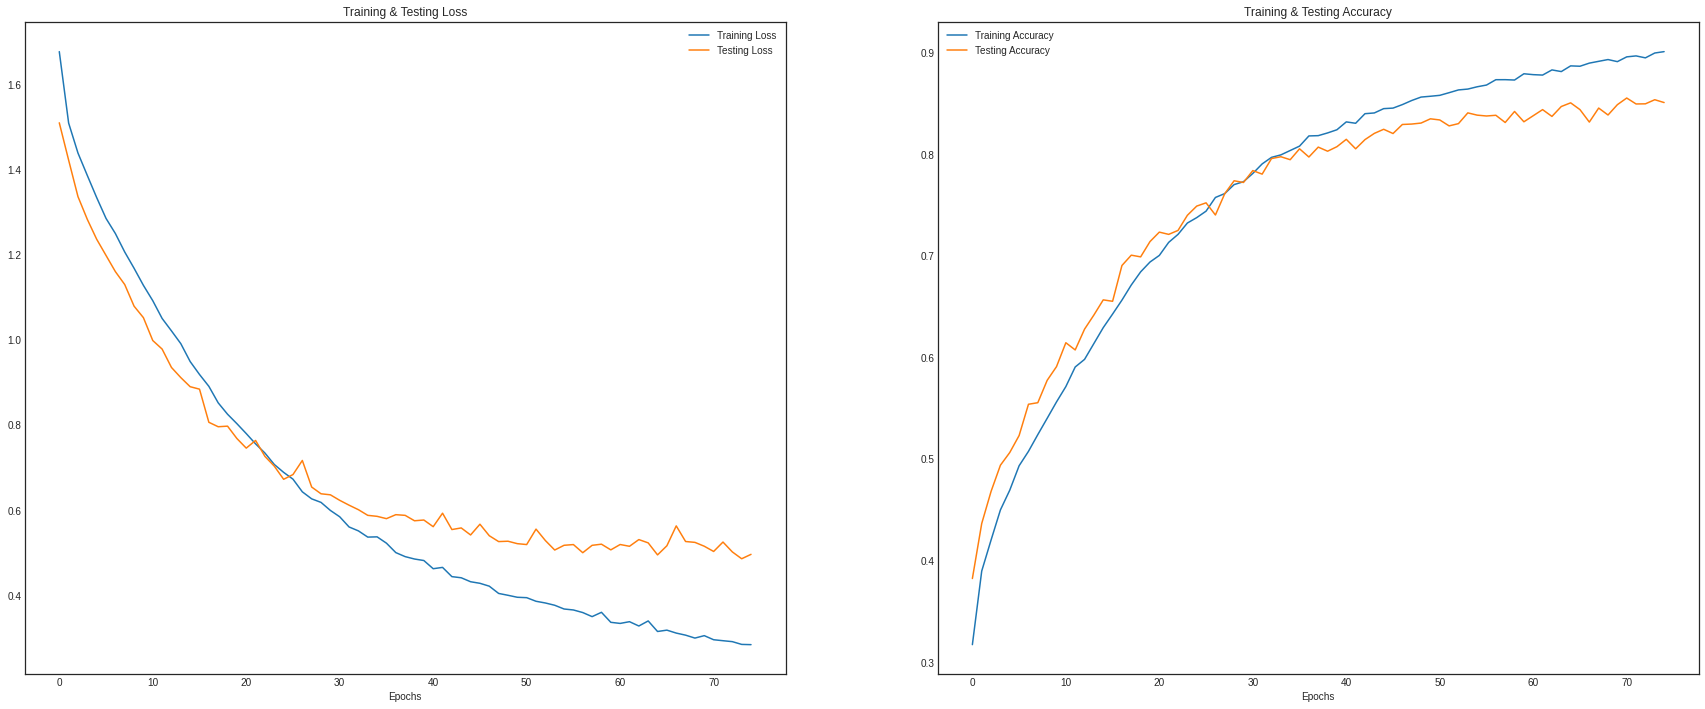

In [ ]:
show_graphs(male_history)

### **Confusion matrix**

In [ ]:
# predicting on test data.
pred_test = female_model.predict(x_testF)
y_pred = encoder.inverse_transform(pred_test)
y_test_ = encoder.inverse_transform(y_testF)

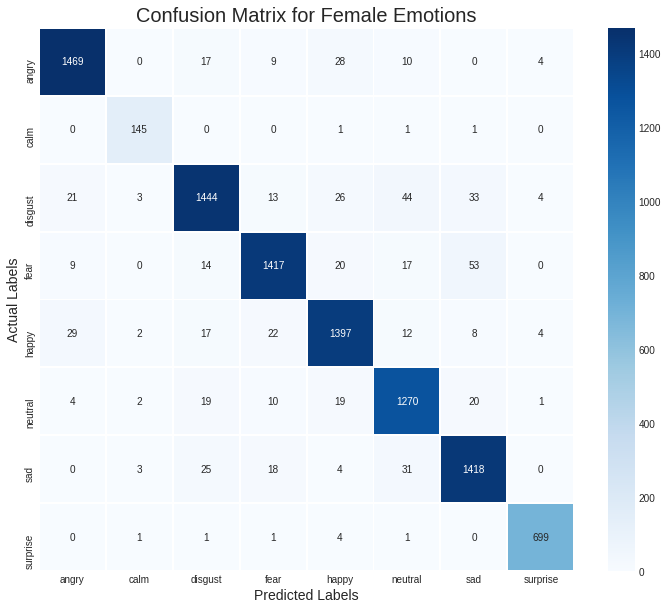

In [ ]:
cm = confusion_matrix(y_test_, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix for Female Emotions', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [ ]:
# predicting on test data.
pred_test = male_model.predict(x_testM)
y_pred = encoder.inverse_transform(pred_test)
y_test_ = encoder.inverse_transform(y_testM)

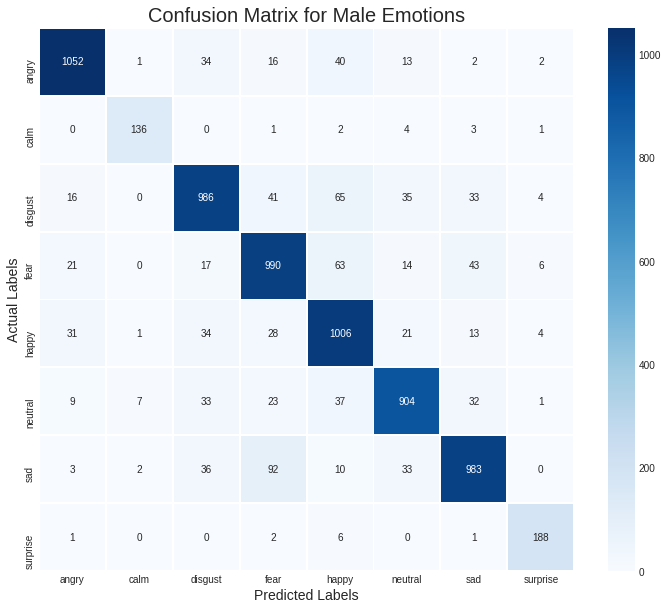

In [ ]:
cm = confusion_matrix(y_test_, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix for Male Emotions', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

## **SVM Classifier**


In [ ]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear', C=1, decision_function_shape='ovo').fit(x_trainM, y_trainM) # Linear Kernel

#Train the model using the training sets
clf.fit(x_trainM, y_trainM)

#Predict the response for test dataset
y_pred = clf.predict(x_testM)

In [ ]:
train_acc = float(clf.score(x_trainM, y_trainM)*100)
print("----train accuracy score %s ----" % train_acc)

test_acc = float(clf.score(x_testM, y_testM)*100)
print("----test accuracy score %s ----" % test_acc)

----train accuracy score 51.10345307713728 ----
----test accuracy score 50.36201615148984 ----
